In [10]:
import pandas as pd
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from boostaroota import BoostARoota
import shap
from boruta import BorutaPy
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = 'https://stepik.org/media/attachments/lesson/779915/fs_task1_10f.csv'
df = pd.read_csv(path)

In [3]:
df

feature_0   feature_1  feature_2  feature_3  feature_4  feature_5  \
0          2015  163.000000  -1.450726        0.5        332  -0.018070   
1          2014  108.451384   2.233679        0.4        425  -0.849765   
2          2010  167.738026  -8.024895       -0.8         50   0.134024   
3          2018  167.000000  -0.201363        2.0        224  -0.985060   
4          2019  183.000000  14.666233        0.8        351   0.606498   
...         ...         ...        ...        ...        ...        ...   
1865       2014  114.849701  -8.475321       -0.3        339  -1.062402   
1866       2011  152.198802  10.065974        0.2        241  -0.365611   
1867       2014  118.000000   9.569632        0.5        450   0.290211   
1868       2012  188.521004  14.327537       -0.7        392   1.218379   
1869       2019  177.056742  -7.959062        0.7        186   0.013798   

      feature_6  feature_7  feature_8  feature_9           target  
0           170         -9       0.10  50.339080  engine_ignition  
1           173         16       0.10  44.367816        break_bug  
2           171         -9       0.10  44.902299     engine_check  
3           173         -2       0.52  44.770115     engine_check  
4           170         13       0.10  45.241379      another_bug  
...         ...        ...        ...        ...              ...  
1865        170          9       0.10  44.419540       gear_stick  
1866        174         -1       0.10  43.488506     engine_check  
1867        171         -3       0.10  44.477011      wheel_shake  
1868        174          1       0.00  48.706897      electro_bug  
1869        173         12       0.00  49.275862      electro_bug  

[1870 rows x 11 columns]

# –õ–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è

/run/user/1000/ipykernel_5390/760304135.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.dropna().corr()


<Axes: >

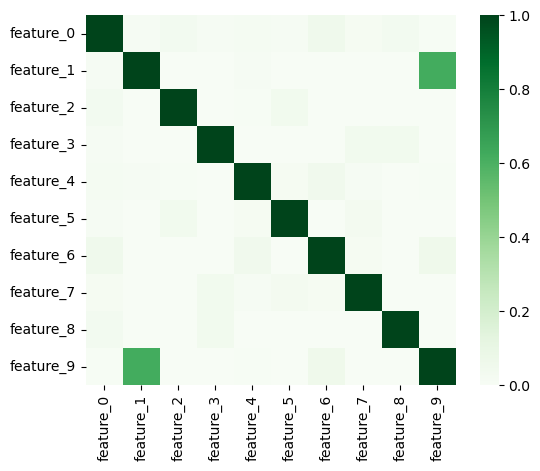

In [11]:
corrs = df.dropna().corr()
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0)

**–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏?**

* ‚úÖ –ë—ã—Å—Ç—Ä–æ –∏ –ø–æ–Ω—è—Ç–Ω–æ
* ‚ùå –ù–µ —É–ª–∞–≤–ª–∏–≤–∞–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
* ‚ùå –£–ø—É—Å–∫–∞–µ—Ç –ø–∞—Ä–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
* ‚ùå –ù–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–π (–Ω—É–∂–µ–Ω –¥—Ä—É–≥–æ–π —Å—Ç–∞—Ç. –∫—Ä–∏—Ç–µ—Ä–∏–π)


# Phik

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


NameError: name 'plt' is not defined

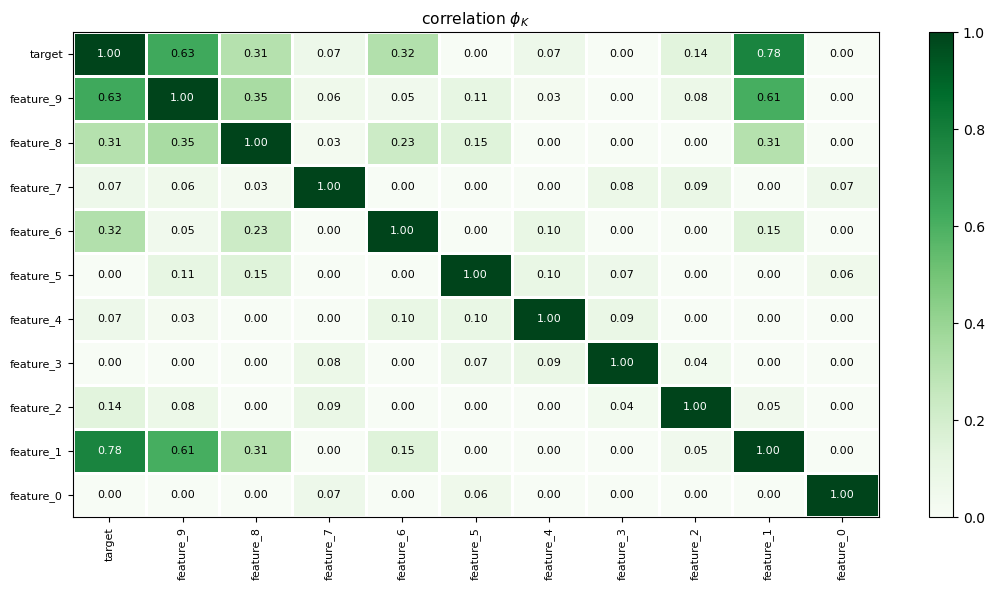

In [13]:
phik_overview = df.phik_matrix().round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


NameError: name 'plt' is not defined

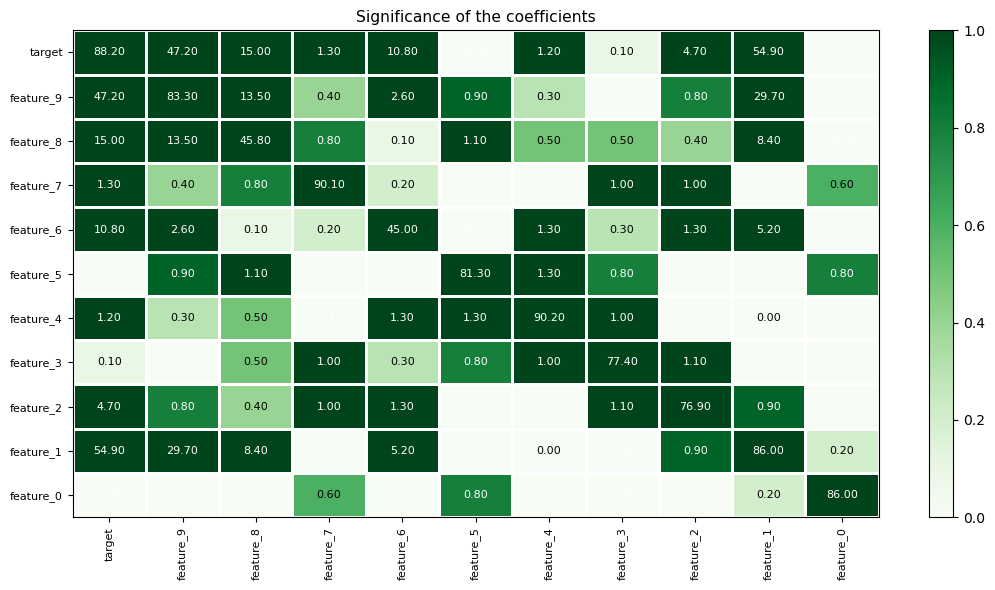

In [15]:
significance_overview = df.significance_matrix().fillna(0).round(1)

plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

**–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ –º–µ—Ç–æ–¥–∞ `phik`?**

* ‚úÖ –†–∞–±–æ—Ç–∞–µ—Ç —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏!
* ‚úÖ –õ–æ–≤–∏—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏!
* ‚ùå –ù–µ –ª–æ–≤–∏—Ç –ø–∞—Ä–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
* ‚ùå –î–æ–ª–≥–æ —Å—á–∏—Ç–∞–µ—Ç—Å—è, –µ—Å–ª–∏ –º–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

# Shap

In [17]:
X = df.drop(columns=['target'])
y = df.target

In [21]:
model = CatBoostClassifier(random_state=42,
                           thread_count=-1)
model.fit(X, y,
          verbose=100, plot=True, 
          early_stopping_rounds=100)

iteritems is deprecated and will be removed in a future version. Use .items instead.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.081693
0:	learn: 1.9690127	total: 125ms	remaining: 2m 4s
100:	learn: 0.5284886	total: 2.23s	remaining: 19.8s
200:	learn: 0.4050902	total: 3.49s	remaining: 13.9s
300:	learn: 0.3281276	total: 4.81s	remaining: 11.2s
400:	learn: 0.2711340	total: 6.97s	remaining: 10.4s
500:	learn: 0.2218551	total: 8.65s	remaining: 8.61s
600:	learn: 0.1878033	total: 10.1s	remaining: 6.73s
700:	learn: 0.1615308	total: 11.6s	remaining: 4.96s
800:	learn: 0.1394795	total: 13.1s	remaining: 3.27s
900:	learn: 0.1200086	total: 15s	remaining: 1.65s
999:	learn: 0.1062787	total: 16.7s	remaining: 0us


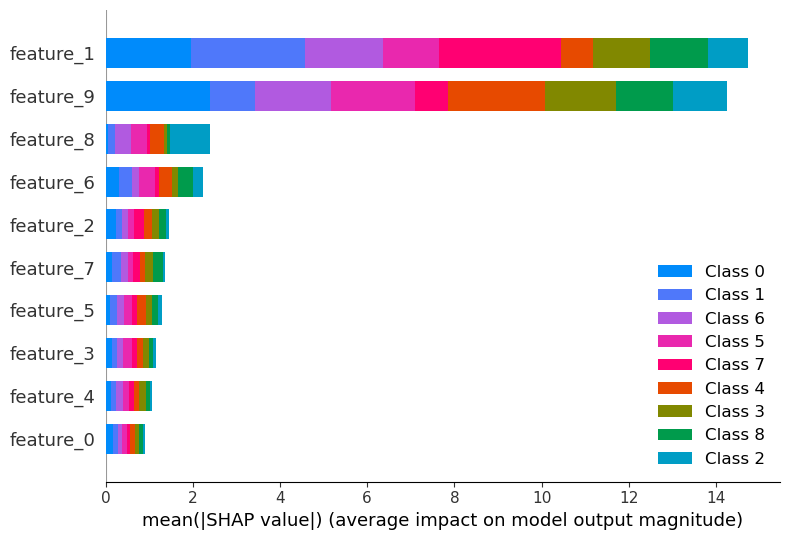

In [23]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ SHAP values
explainer = shap.TreeExplainer(model)

val_dataset = Pool(data=X, label=y)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X, max_display = 25)

## <center>üòº CatBoost feature selection (—Ä–µ–∫—É—Ä—Å–∏–≤–Ω—ã–µ –º–µ—Ç–æ–¥—ã)</center>

<div class="alert alert-info">    

**–°—É—Ç—å —Ä–µ–∫—É—Ä—Å–∏–≤–Ω—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤: —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Å–º–æ—Ç—Ä–∏–º, —É–º–µ–Ω—å—à–∏—Ç—Å—è –ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ. –ï—Å–ª–∏ —É–º–µ–Ω—å—à–∏–ª–æ—Å—å, –∑–Ω–∞—á–∏—Ç –ø—Ä–∏–∑–Ω–∞–∫ –≤—Ä–µ–¥–Ω—ã–π**    
    
    
<p id="g4"></p>     
    
–í –±–∏–±–ª–∏–æ—Ç–µ–∫–µ CatBoost –µ—Å—Ç—å –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –¥–ª—è –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ [select_features](https://catboost.ai/en/docs/concepts/python-reference_catboost_select_features), –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç 3 –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –ø–∞—Ä–∞–º–µ—Ç—Ä `algorithm`:
* `RecursiveByPredictionValuesChange` - —Å–∞–º—ã–π –±—ã—Å—Ç—Ä—ã–π –∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç–æ—á–Ω—ã–π
* `RecursiveByLossFunctionChange` - –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—é —Ç–æ—á–Ω–æ—Å—Ç—å/—Å–∫–æ—Ä–æ—Å—Ç—å
* `RecursiveByShapValues` (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é) - –Ω–∞–∏–±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–π, –Ω–æ —Å–∞–º—ã–π —Ä–µ—Å—É—Ä—Å–æ–∑–∞—Ç—Ä–∞—Ç–Ω—ã–π <br>
–ï—Å–ª–∏ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –≤—Ä–µ–º–µ–Ω–∏ (—Ä–µ—Å—É—Ä—Å–æ–≤) –Ω–∞ —Å–∞–º—ã–π —Ç–æ—á–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º, –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ.

In [27]:
summary = model.select_features(X, y,
                      features_for_select='0-9',
                      num_features_to_select=8,
                      steps=1,
                      train_final_model=False,
                      logging_level='Silent')

In [28]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–ø–∏—Å–æ–∫ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö —Ñ–∏—á–µ–π (–Ω–µ –æ—Ç—Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏)
print(summary['selected_features_names'])
# –ò –Ω–∞ –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ª–æ—Å—Å–∞
print(f"Best loss: {summary['loss_graph']['loss_values'][-1]}")

['feature_1', 'feature_2', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']
Best loss: 0.14980415932250804


In [29]:
summary

{'selected_features': [1, 2, 4, 5, 6, 7, 8, 9],
 'eliminated_features_names': ['feature_0', 'feature_3'],
 'loss_graph': {'main_indices': [0],
  'removed_features_count': [0, 1, 2],
  'loss_values': [0.10627874488135618,
   0.12197751113786932,
   0.14980415932250804]},
 'eliminated_features': [0, 3],
 'selected_features_names': ['feature_1',
  'feature_2',
  'feature_4',
  'feature_5',
  'feature_6',
  'feature_7',
  'feature_8',
  'feature_9']}

# <center>üß† –ú—ã—Å–ª–∏ –∏ —Å–æ–≤–µ—Ç—ã –ø–æ –æ—Ç–±–æ—Ä—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
    
    
<p id="6"></p> 

<div class="alert alert-info">
  
* **–†–µ–∫—É—Ä—Å–∏–≤–Ω—ã–µ** –º–µ—Ç–æ–¥—ã –æ—Ç–±–æ—Ä–∞ —Å–∞–º—ã–µ **—Ç–æ—á–Ω—ã–µ**, –Ω–æ —Å–∞–º—ã–µ –¥–æ–ª–≥–∏–µ. (–û—Å–æ–±–µ–Ω–Ω–æ, –∫–æ–≥–¥–∞ –¥–∞–Ω–Ω—ã—Ö –º–Ω–æ–≥–æ –∏ –ø—Ä–∏ —ç—Ç–æ–º —Ñ–∏—á–µ–π > 30)
* –ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –ø—Ä–∏–º–µ–Ω—è—Ç—å –∫–∞–∫–æ–π-–ª–∏–±–æ –∏–∑ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –æ—Ç–±–æ—Ä–∞, –ø–æ–ª–µ–∑–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å –Ω–∞—á–∞–ª—å–Ω—ã–π EDA –∏ –æ—Ç–∫–∏–¥—ã–≤–∞—Ç—å —è–≤–Ω—ã–π –º—É—Å–æ—Ä.
* –ù–µ–ª—å–∑—è –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—Ç—å—Å—è –∫–∞–∫–∏–º-—Ç–æ –æ–¥–Ω–∏–º –º–µ—Ç–æ–¥–æ–º, –ø—É—Å—Ç—å –¥–∞–∂–µ –≤ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∑–∞–¥–∞—á–∞—Ö –æ–Ω —Å–µ–±—è –æ—Ç–ª–∏—á–Ω–æ –ø–æ–∫–∞–∑–∞–ª.

<div class="alert alert-info">
    
* –ï—Å–ª–∏ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç —Ä–µ—Å—É—Ä—Å–æ–≤ –¥–ª—è —Ä–∞–±–æ—Ç—ã –∫–∞–∫–æ–≥–æ-–Ω–∏–±—É–¥—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞, –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –µ–≥–æ –∫ –º–µ–Ω—å—à–µ–º—É —Å—ç–º–ø–ª—É –¥–∞–Ω–Ω—ã—Ö. <br>
* –ú–æ–∂–Ω–æ –≤–∑—è—Ç—å 20% –æ—Ç –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –ø—Ä–æ–≥–Ω–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º –æ—Ç–±–æ—Ä–∞, —Ç–æ–ª—å–∫–æ —Å–ª–µ–¥–∏—Ç–µ –∑–∞ —Ç–µ–º, —á—Ç–æ–±—ã —Å—ç–º–ø–ª –±—ã–ª —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–µ–Ω
* –ü–æ—Å—Ç–æ—è–Ω–Ω–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ –∏ —Å–≤–µ—Ä—è–π—Ç–µ—Å—å —Å –ª–∏–¥–µ—Ä–±–æ—Ä–¥–æ–º. –í—Å–µ–≥–¥–∞ –µ—Å—Ç—å —Ä–∏—Å–∫–∏ –æ—Ç—Å–µ—è—Ç—å —á—Ç–æ-—Ç–æ –ø–æ–ª–µ–∑–Ω–æ–µ.
    

<div class="alert alert-info">
    
* –ú–µ–Ω–µ–µ —Ç–æ—á–Ω—ã–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ –º–æ–∂–Ω–æ –ø—Ä–µ–æ—Ä–∏—Ç–∏–∑–∏—Ä–æ–≤–∞—Ç—å —É–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
* –ú–µ—Ç–æ–¥—ã —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ —Ñ–∏—á–µ–π –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω—è—Ç—å –º–µ–∂–¥—É —Å–æ–±–æ–π. –ù–∞–ø—Ä–∏–º–µ—Ä: —É–¥–∞–ª—è—Ç—å —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–ª–∏—Å—å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏ 
* –ü—Ä–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–º –≤—Ä–µ–º–µ–Ω–∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–±–æ—Ä –≤ –ø–æ–ª—å–∑—É __feature engeneering__'–∞. –¢–∞–∫ –∫–∞–∫ –Ω–æ–≤—ã–µ —Å–∏–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–≥—É—Ç –¥–æ–±–∞–≤–∏—Ç—å –¥–µ—Å—è—Ç–∫–∏ % –∫ —Ç–æ—á–Ω–æ—Å—Ç–∏, –∞ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è —É–∂–µ –∏–º–µ—é—â–∏—Ö—Å—è, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –µ–¥–∏–Ω–∏—Ü—ã –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤.

# HomeWork

In [30]:
path = 'https://stepik.org/media/attachments/lesson/779915/fs_task2_22f.csv'
df = pd.read_csv(path)

In [31]:
df

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0             0   4.101552        173          1   3.405865      88182   
1             0   4.303506        173          1  -2.218952      86897   
2             0   4.246379        174          1  -3.740321      44604   
3             0   4.342874        172          1   3.139031     114610   
4             1   4.140287        148          0  -4.022916     114851   
...         ...        ...        ...        ...        ...        ...   
1865          0   5.345345        173          1  -1.504180      42550   
1866          0   4.042874        172          1  -1.079727      65913   
1867          0   3.977816        174          1  -3.001480      62873   
1868          0   4.540920        172          1   1.771542      80826   
1869          0   5.464713        174          1  -0.002251     110513   

       feature_6     feature_7  feature_8  feature_9  ...  feature_12  \
0     157.168032  1.973071e+07          0          1  ...        2015   
1     121.805143  1.594185e+07          0          0  ...        2015   
2     175.889164  2.127630e+07          0          0  ...        2013   
3     151.653445  2.250440e+07          0          0  ...        2017   
4     159.547387  1.163474e+07          0          0  ...        2017   
...          ...           ...        ...        ...  ...         ...   
1865  176.567014  1.208544e+07          0          0  ...        2013   
1866  128.338875  1.672780e+07          0          1  ...        2014   
1867  124.795590  1.823968e+07          0          1  ...        2014   
1868  131.572570  1.167350e+07          0          0  ...        2015   
1869  160.245456  2.194206e+07          0          0  ...        2017   

      feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0     191.996603        2020        0.10           0         174           9   
1     193.547718        2015        0.10           1         174           7   
2     177.922027        2019        0.10           1         174           6   
3     110.165268        2016        0.70           1         174          20   
4     190.915943        2020        0.10           0         174          25   
...          ...         ...         ...         ...         ...         ...   
1865  109.836630        2018        0.10           1         174           8   
1866  196.975349        2016        0.10           0         174          16   
1867  179.247675        2016        0.10           0         174          14   
1868  142.000000        2019        0.10           1         174           5   
1869  109.725364        2017        0.46           1         174          17   

      feature_19  target_reg     target_class  
0           4.76       57.15  engine_ignition  
1           4.26       60.82  engine_ignition  
2           5.98       46.51  engine_ignition  
3           4.42       30.71       gear_stick  
4           4.28       59.18      engine_fuel  
...          ...         ...              ...  
1865        1.92       31.75        break_bug  
1866        3.84       50.87  engine_overheat  
1867        4.04       54.30  engine_ignition  
1868        2.22       56.62     engine_check  
1869        4.26       23.12        break_bug  

[1870 rows x 22 columns]

In [34]:
df['feature_11']

0       24
1        2
2       27
3       49
4        4
        ..
1865     0
1866    33
1867    44
1868    43
1869     9
Name: feature_11, Length: 1870, dtype: int64

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'target_reg']


Not enough unique value for variable feature_17 for analysis 1. Dropping this column


NameError: name 'plt' is not defined

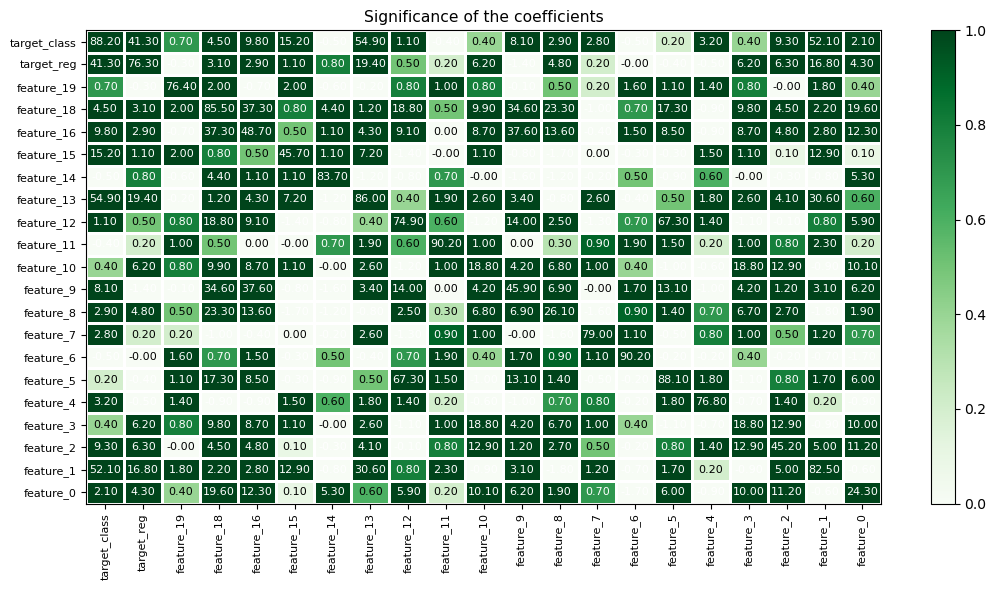

In [32]:
significance_overview = df.significance_matrix().fillna(0).round(1)

plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'target_reg']


Not enough unique value for variable feature_17 for analysis 1. Dropping this column


NameError: name 'plt' is not defined

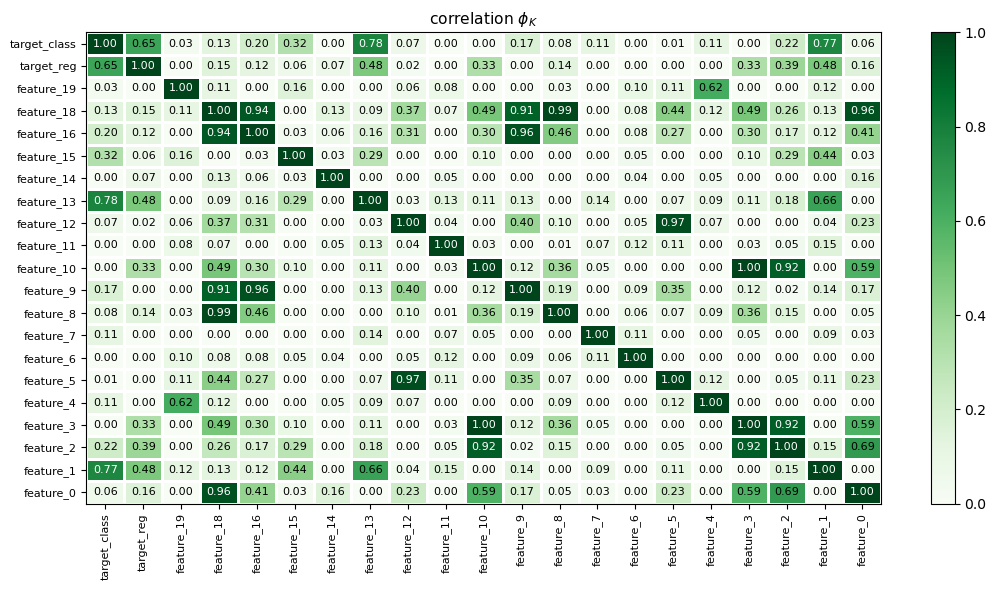

In [33]:
phik_overview = df.phik_matrix().round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

In [ ]:
X = 

In [ ]:
model = CatBoostClassifier(random_state=42,
                           thread_count=-1)
model.fit(X, y,
          verbose=100, plot=True, 
          early_stopping_rounds=100)

In [3]:
path = 'https://stepik.org/media/attachments/lesson/779915/fs_task3_310f.csv'
df = pd.read_csv(path)

In [4]:
df

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0        -0.917     -0.313      -0.69      0.771      0.086      44800   
1         1.406      0.324       0.88      0.104      1.275       2097   
2         0.908      0.652       0.62      0.482      0.768      21520   
3        -0.527     -0.892      -0.12     -0.764     -0.811       7649   
4         0.050      0.646      -2.51      0.510     -0.755      27745   
...         ...        ...        ...        ...        ...        ...   
1631     -0.960     -0.699      -0.04      0.238     -1.751      13201   
1632      0.088     -0.612       1.30      0.716     -0.039      46709   
1633     -0.577     -1.050      -1.05      0.160      1.644      26344   
1634      1.074     -1.027      -0.53     -0.519     -1.341      42592   
1635     -0.501     -1.181      -0.47     -1.406     -0.318      20762   

      feature_6  feature_7  feature_8  feature_9  ...  feature_301  \
0          1.38      42902      -0.40       0.51  ...        49118   
1         -0.53      19640       0.25       1.12  ...        23477   
2          0.88       7491       1.07       0.58  ...        19738   
3          0.61      12421      -1.78       0.21  ...        27290   
4          0.00      38967       1.08       1.46  ...        43419   
...         ...        ...        ...        ...  ...          ...   
1631       0.91      39896       0.33      -1.05  ...        37689   
1632      -0.35      17423       0.78      -1.61  ...        18623   
1633      -0.17      47545       0.35       0.51  ...        23284   
1634       0.16      27582       0.15       0.65  ...        23016   
1635      -0.93      25885      -1.07      -0.22  ...        49835   

      feature_302  feature_303  feature_304  feature_305  feature_306  \
0           43122        -0.99        -0.68        -0.07         8006   
1           26027         0.20         0.24        -0.13         9512   
2            5099         1.53         0.18         0.69        35420   
3           17042        -1.84        -0.76        -0.10        36626   
4            6234        -0.97        -0.62         0.91        35750   
...           ...          ...          ...          ...          ...   
1631        13329        -0.57         0.19        -0.54        16087   
1632        28892         0.65        -0.60        -0.96        38816   
1633        22642        -1.22        -1.03         0.82        27475   
1634        42662        -1.15         0.24         0.84        19920   
1635        32051         0.86        -0.88         0.55        10935   

      feature_307  feature_308  feature_309       target  
0          -0.166         0.40          173   gear_stick  
1           0.816         1.28          173  wheel_shake  
2           0.994         0.16          170    break_bug  
3           0.867        -2.71          170  another_bug  
4           0.076        -0.07          173  electro_bug  
...           ...          ...          ...          ...  
1631       -0.487        -0.35          172   gear_stick  
1632       -1.602        -2.95          171   gear_stick  
1633       -0.302         1.88          170  another_bug  
1634        0.323        -0.05          174  electro_bug  
1635        0.573         2.08          172    break_bug  

[1636 rows x 311 columns]

In [14]:
model = CatBoostClassifier(random_state=42,
                           thread_count=-1)
model.fit(X, y,
          verbose=100, plot=True, 
          early_stopping_rounds=100)

summary = model.select_features(X, y,
                      features_for_select='0-309',
                      num_features_to_select=10,
                      steps=1,
                      train_final_model=False,
                      logging_level='Silent')

iteritems is deprecated and will be removed in a future version. Use .items instead.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.081138
0:	learn: 1.9907286	total: 1.45s	remaining: 24m 13s
100:	learn: 0.5146544	total: 1m 14s	remaining: 11m
200:	learn: 0.3180530	total: 2m 23s	remaining: 9m 31s
300:	learn: 0.2326517	total: 3m 33s	remaining: 8m 15s
400:	learn: 0.1763633	total: 4m 43s	remaining: 7m 3s
500:	learn: 0.1363206	total: 5m 53s	remaining: 5m 52s
600:	learn: 0.1103381	total: 7m 3s	remaining: 4m 41s
700:	learn: 0.0890897	total: 8m 12s	remaining: 3m 30s
800:	learn: 0.0742432	total: 9m 21s	remaining: 2m 19s
900:	learn: 0.0619418	total: 10m 30s	remaining: 1m 9s
999:	learn: 0.0528014	total: 11m 40s	remaining: 0us


KeyboardInterrupt: 

In [15]:
model.fit(X, y,
          verbose=100, plot=True, 
          early_stopping_rounds=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.081138
0:	learn: 1.9907286	total: 874ms	remaining: 14m 32s
100:	learn: 0.5146544	total: 1m 10s	remaining: 10m 24s
200:	learn: 0.3180530	total: 2m 18s	remaining: 9m 9s
300:	learn: 0.2326517	total: 3m 25s	remaining: 7m 57s
400:	learn: 0.1763633	total: 4m 33s	remaining: 6m 49s
500:	learn: 0.1363206	total: 5m 43s	remaining: 5m 42s
600:	learn: 0.1103381	total: 6m 53s	remaining: 4m 34s
700:	learn: 0.0890897	total: 8m 2s	remaining: 3m 25s
800:	learn: 0.0742432	total: 9m 11s	remaining: 2m 17s
900:	learn: 0.0619418	total: 10m 21s	remaining: 1m 8s
999:	learn: 0.0528014	total: 11m 30s	remaining: 0us


In [21]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫–∞—Ç–±—É—Å—Ç–∞
fi = model.get_feature_importance(prettified=True)
fi.loc[:10, :]

Feature Id  Importances
0   feature_141    29.971430
1   feature_234    23.427756
2    feature_59     7.764092
3   feature_309     1.976570
4    feature_81     0.452120
5   feature_202     0.375178
6   feature_161     0.353457
7    feature_43     0.341612
8   feature_263     0.322266
9     feature_9     0.314623
10  feature_203     0.284179